In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
print(os.listdir('/content/drive'))

['MyDrive', '.shortcut-targets-by-id', '.file-revisions-by-id', '.Trash-0', '.Encrypted']


# **1. VERİ ÖNİŞLEME**

pandas,numpy,matplotlib ve Seaborn modülünü içe aktarma
*italik metin*

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/İrisVeriseti'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/İrisVeriseti/Iris.csv


In [30]:
iris=pd.read_csv('/content/drive/MyDrive/İrisVeriseti/Iris.csv') ## Iris veri kümesini içe aktarma


In [29]:
iris.head(10)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [32]:
iris['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [31]:
##Bu veri setinde İris bitkisinin üç çeşidi bulunmaktadır.
iris.describe(include='all')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [ ]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Yukarıda gördüğümüz gibi her sınıftaki veri noktalarının dağılımı eşittir, dolayısıyla Iris her sınıf için veri noktası sayısı 150 olduğundan dengeli bir veri kümesidir.


In [33]:
## Gereksiz sütunun kaldırılması
iris.drop(columns="Id",inplace=True)

In [34]:
##Eksik değer olup olmadığını kontrol etme
iris.isnull().sum()


,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


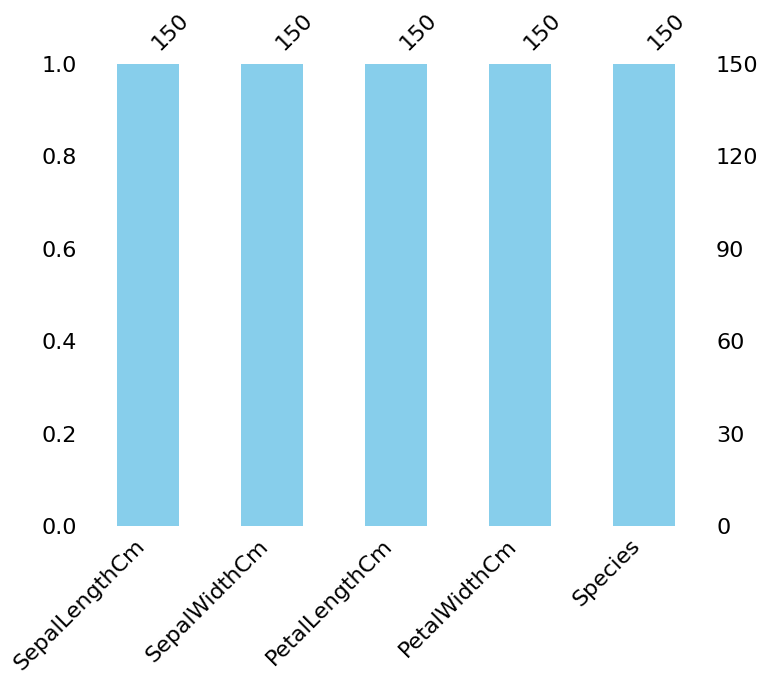

In [35]:
import missingno as msno
msno.bar(iris,figsize=(8,6),color='skyblue')
plt.show()

##Kaçar tane olduğunu grafik olarak gösterdik.

Bu veri setinde eksik değer bulunmamaktadır


# ***2. Veri Görselleştirme***


# 2.1 Dağılım Grafiği

Dağılım grafiği, iki farklı değişken için elde edilen değerleri temsil etmek üzere noktalar kullanan iki boyutlu bir veri görselleştirmesidir - biri x ekseni boyunca, diğeri y ekseni boyunca çizilmiştir; herhangi iki özellik arasındaki dağılım grafiğini çizebiliriz. taç yaprağı uzunluğu ve taç yaprağı genişliğine bir örnek alıyorum.



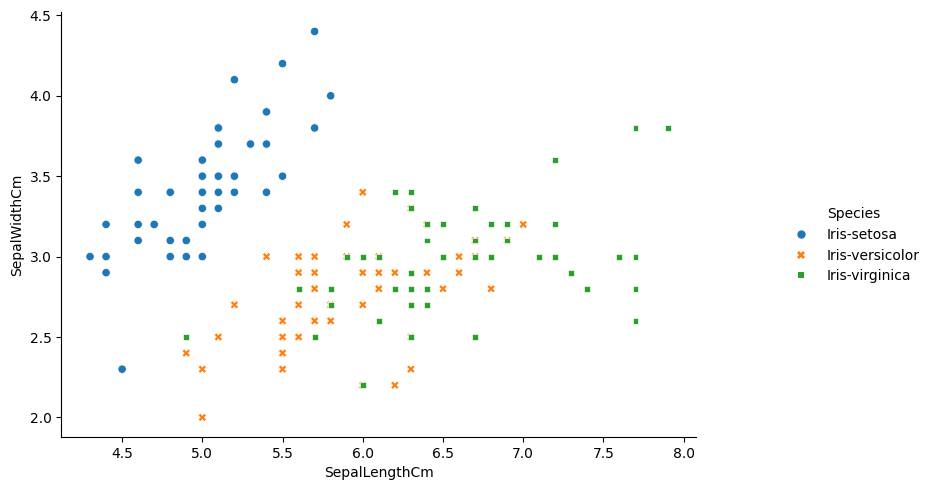

In [ ]:
g=sns.relplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

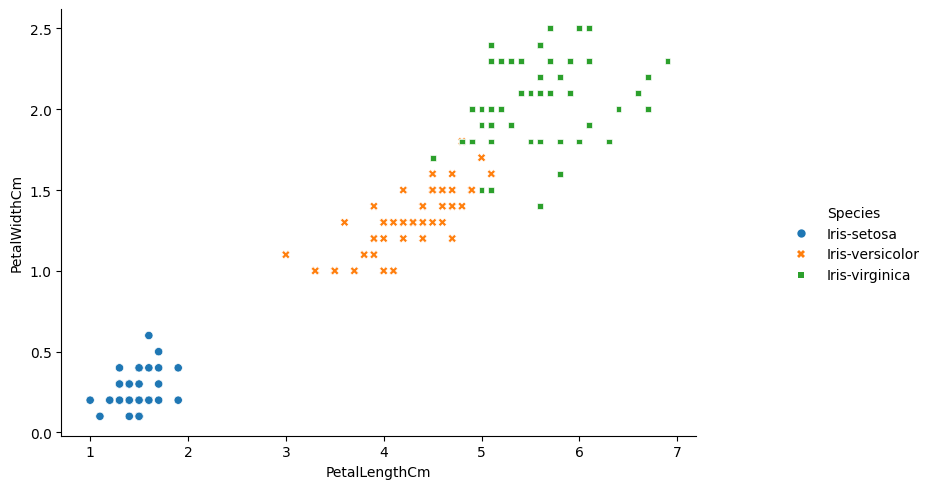

In [ ]:
g=sns.relplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,hue='Species',style='Species')
g.fig.set_size_inches(10,5)
plt.show()

Gördüğümüz gibi Petal Özellikleri, Sepal özelliklerine kıyasla daha iyi bir küme bölünmesi sağlıyor. Bu, Petallerin Sepal üzerinde daha iyi ve doğru Tahminlerde yardımcı olabileceğinin bir göstergesi.


# **2.2 Çift Grafik**
Çift Grafikleri, her değişken arasındaki ilişkileri görselleştirmenin gerçekten basit (tek satırlık kod basit!) bir yoludur. Verilerimizin anında incelenmesi için verilerinizdeki her değişken arasındaki ilişkilerin bir matrisini oluşturur. çift ​​grafiği farklı özelliklerin dağılım grafiğini verir. iris veri seti için çift grafiği.


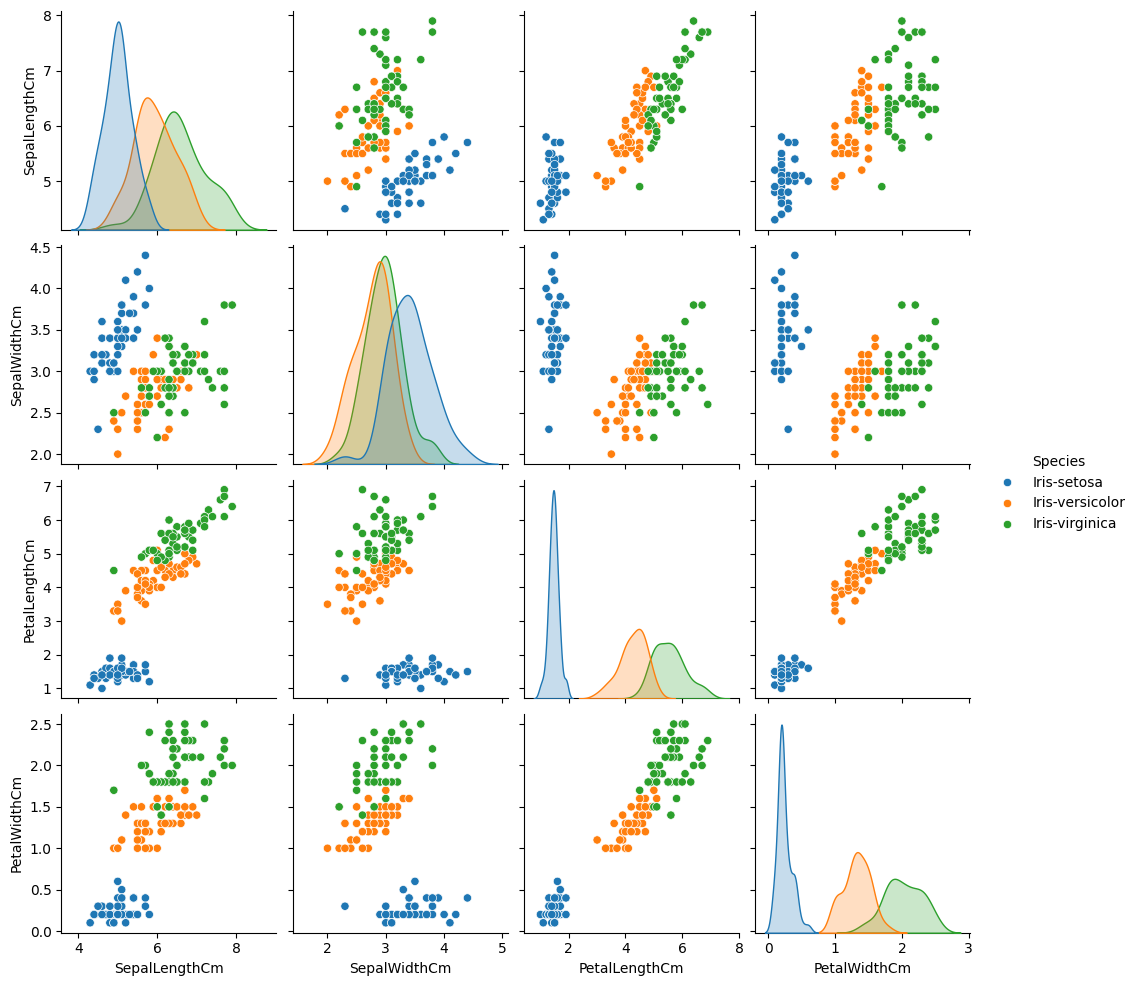

In [ ]:
sns.pairplot(iris,hue="Species")
plt.show()

grafikten herhangi iki özellik arasındaki dağılım grafiğini ve dağılımları görebiliriz. Turba uzunluğunun üzerindeki dağılımlar iris setosayı kalanlardan ayırmaktadır. Yaprak uzunluğu ile taç yaprağı genişliği arasındaki alandan çiçekleri ayırabiliriz


# **2.3 Kutu Grafiği**
kutu grafiği, beş rakamlı bir özete ("minimum", ilk çeyrek (Q1), medyan, üçüncü çeyrek (Q3) ve "maksimum") dayalı olarak veri dağılımını görüntülemenin standartlaştırılmış bir yoludur. Size aykırı değerleriniz ve değerlerinin ne olduğu hakkında bilgi verebilir. Ayrıca verilerinizin simetrik olup olmadığını, verilerinizin ne kadar sıkı bir şekilde gruplandırıldığını ve verilerinizin çarpık olup olmadığını ve nasıl çarpık olduğunu da söyleyebilir.

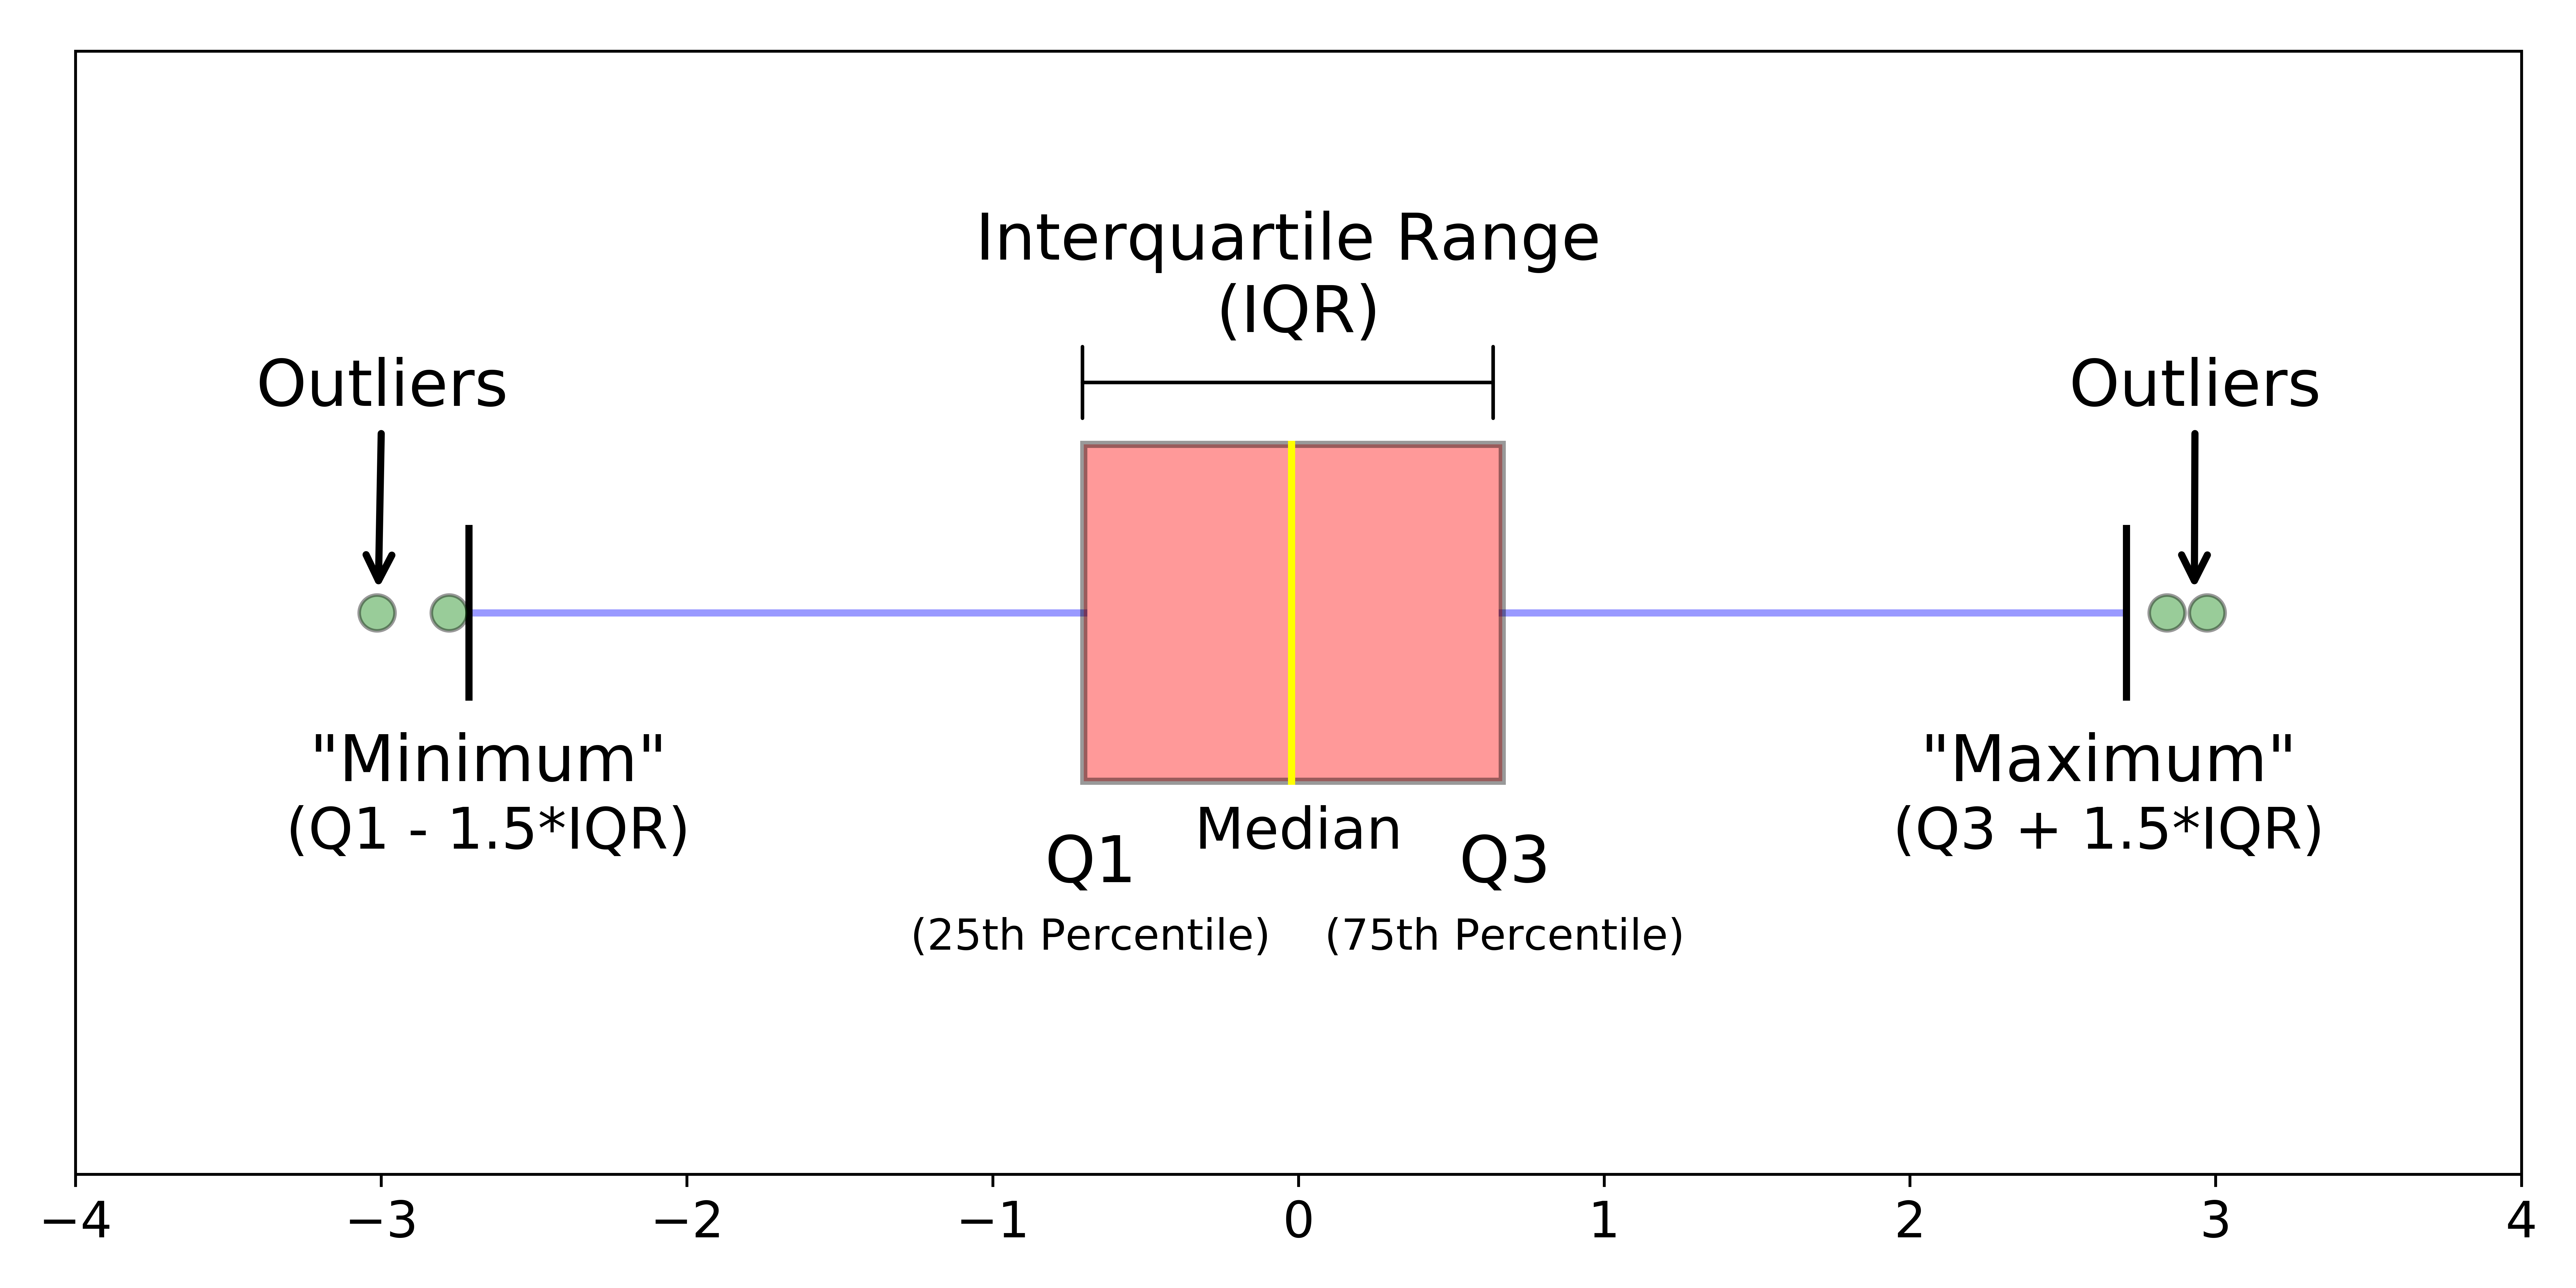

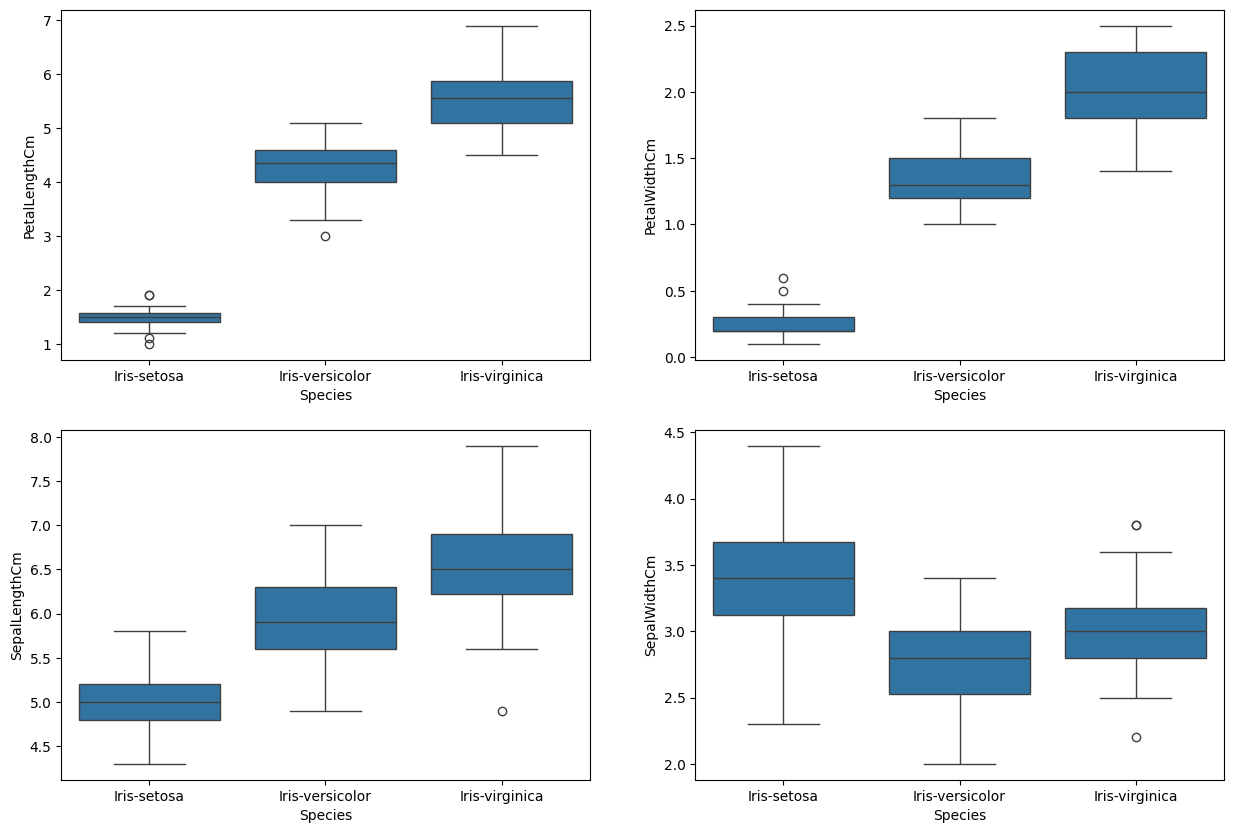

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

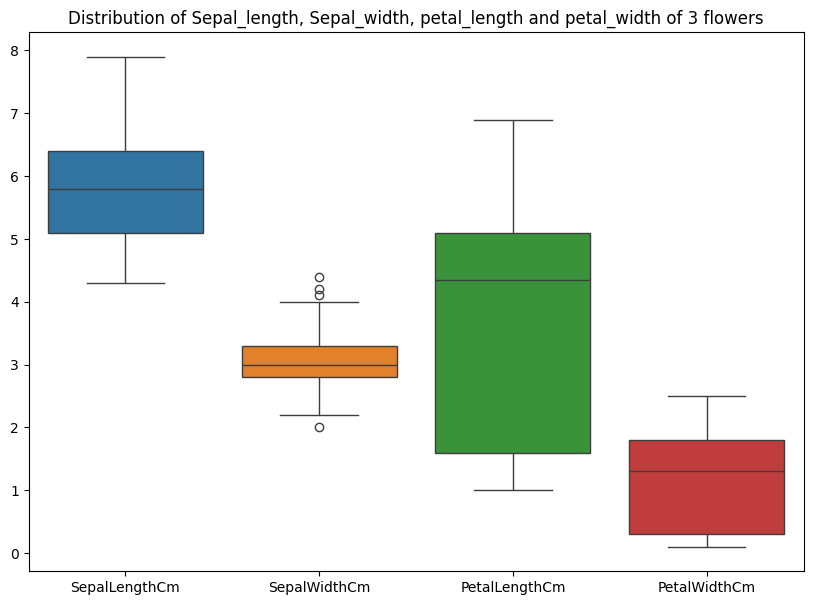

In [20]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=iris).set_title("Distribution of Sepal_length, Sepal_width, petal_length and petal_width of 3 flowers")
plt.show()

# **2.4 Keman Grafiği**

Keman Grafiği, farklı değişkenlere ait sayısal verilerin dağılımını görselleştirmeye yönelik bir yöntemdir. Kutu Grafiği'ne benzer ancak her iki tarafta döndürülmüş bir çizim bulunur ve y eksenindeki yoğunluk tahmini hakkında daha fazla bilgi verir. Yoğunluk yansıtılır, ters çevrilir ve ortaya çıkan şekil doldurularak kemana benzeyen bir görüntü oluşturulur. Keman grafiğinin avantajı, dağıtımdaki kutu grafiğinde algılanamayan nüansları gösterebilmesidir. Öte yandan, kutu grafiği verilerdeki aykırı değerleri daha net bir şekilde gösterir.


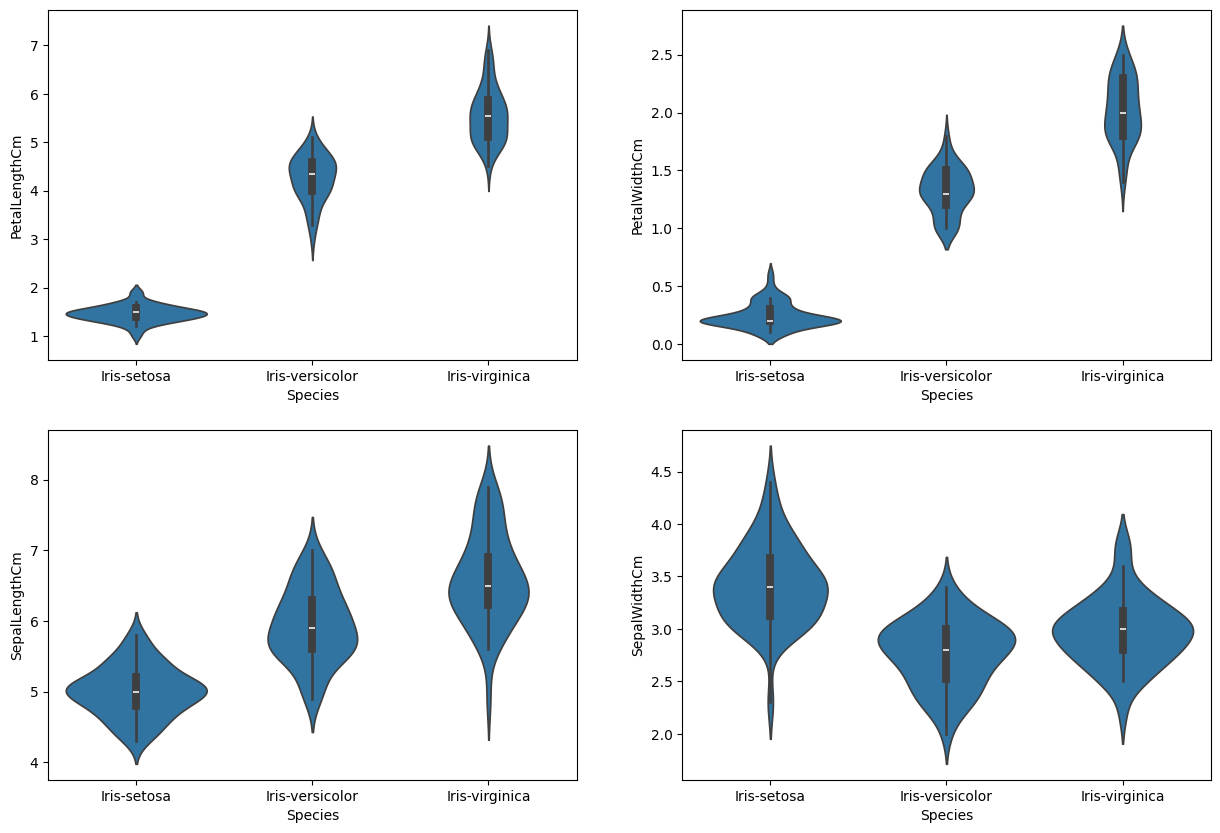

In [21]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


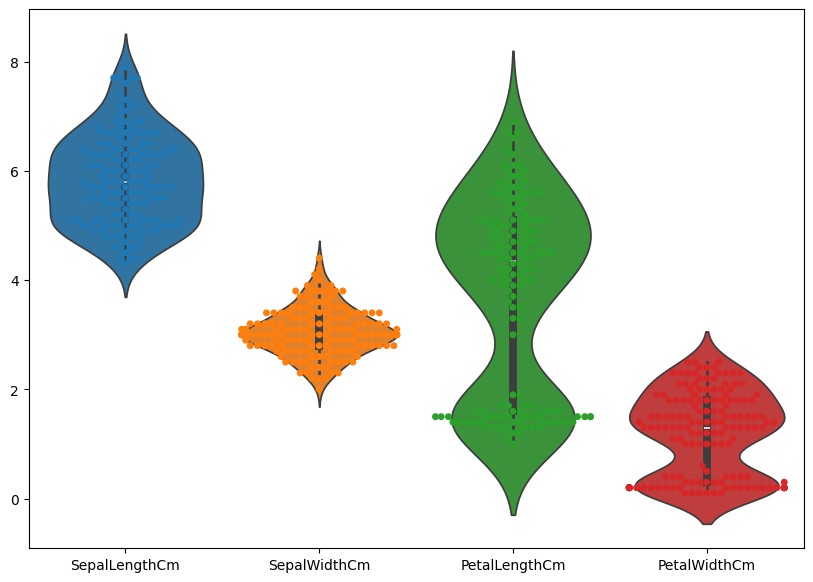

In [22]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=iris)
sns.swarmplot( data=iris)
plt.show()

# **2.5 Alan Arsa**
Alan Grafiği bize Iris çiçeğinin çeşitli boyutlarının ve veri setindeki aralıklarının görsel bir temsilini verir.


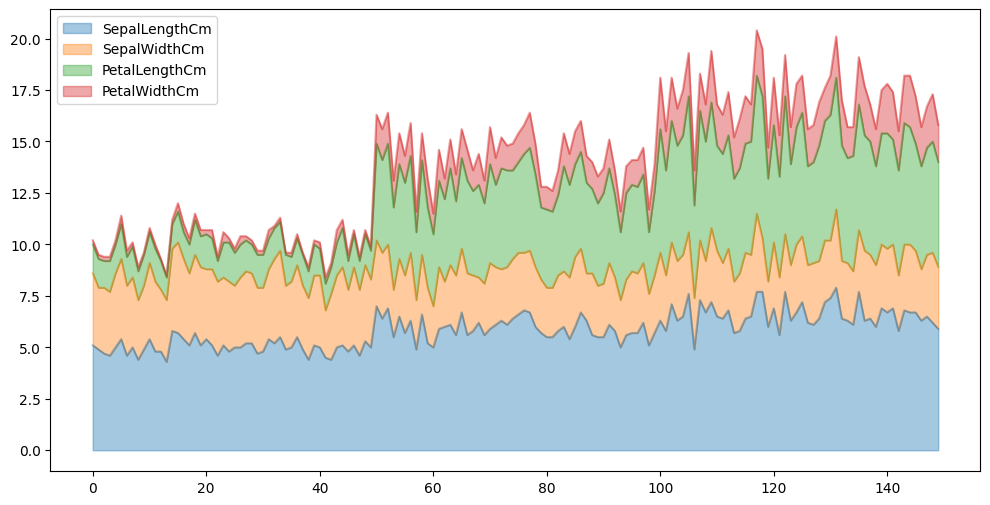

In [26]:
iris.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));


# ** 2.6 Korelasyon**
Artık herhangi bir algoritmayı eğittiğimizde özelliklerin sayısı ve bunların korelasyonu önemli bir rol oynuyor. Eğer özellikler varsa ve özelliklerin birçoğu yüksek düzeyde korelasyona sahipse, o zaman bir algoritmayı tüm özelliklerle eğitmek doğruluğu azaltacaktır. Bu nedenle özellik seçimi dikkatli yapılmalıdır. Bu veri kümesinin daha az özelliği var ama yine de korelasyonu göreceğiz. correlation-examples.svg

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['Species'] = le.fit_transform(iris['Species'])
print(iris.head())
correlation_matrix = iris.corr()
print(correlation_matrix)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0
               SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
SepalLengthCm       1.000000     -0.109369       0.871754      0.817954   
SepalWidthCm       -0.109369      1.000000      -0.420516     -0.356544   
PetalLengthCm       0.871754     -0.420516       1.000000      0.962757   
PetalWidthCm        0.817954     -0.356544       0.962757      1.000000   
Species             0.782561     -0.419446       0.949043      0.956464   

                Species  
SepalLengthCm  0.782561  
SepalWidthCm  -0.419446  
PetalLengthCm  0.949043  
PetalWidthCm   0.956464  
Speci

In [43]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


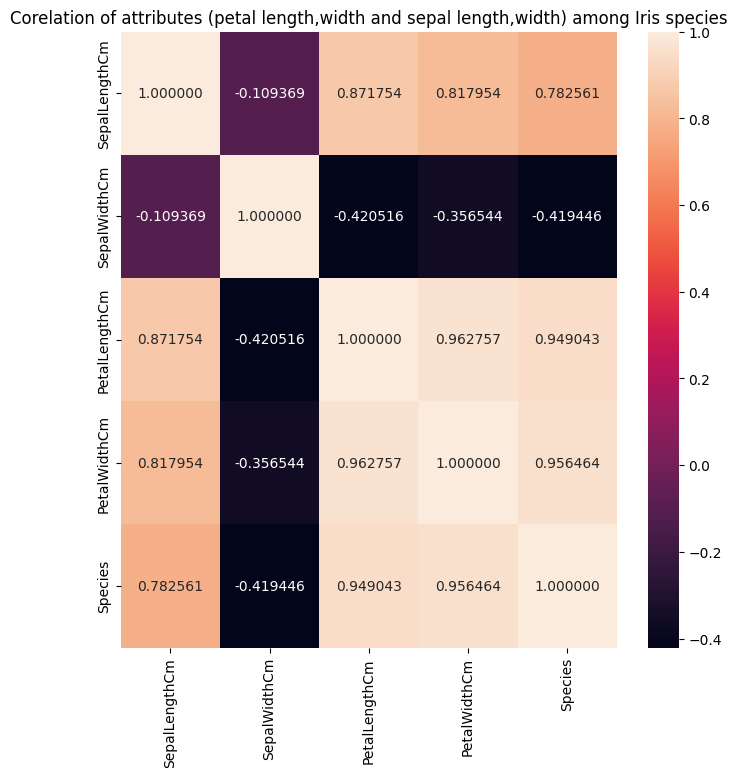

In [44]:
plt.subplots(figsize = (8,8))
sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

**Verileri özelliklere ve etiketlere bölme**

Gördüğümüz gibi veri seti altı sütun içeriyor: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm ve Species. Gerçek özellikler 1-4 arasındaki sütunlarda açıklanmaktadır. Son sütun örneklerin etiketlerini içerir. Öncelikle verileri iki diziye ayırmamız gerekiyor: X (özellikler) ve y (etiketler).


In [45]:
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

# **Label encoding**

Gördüğümüz gibi etiketler kategoriktir.Bunları sayılara dönüştürmek için LabelEncoder kullanmamız gerekiyor. Iris-setosa 0'a, Iris-versicolor 1'e ve Iris-virginica 2'ye karşılık gelir.

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# **3.Makine Öğrenme Modelleri Oluşturma**


In [47]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

In [48]:
#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [49]:
##Verileri Eğitim ve Test Veri Kümelerine Bölme
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


# **Gauss Naif Bayes:**

Naive Bayes, ikili (iki sınıflı) ve çok sınıflı sınıflandırma problemlerine yönelik bir sınıflandırma algoritmasıdır. Teknik, ikili veya kategorik giriş değerleri kullanılarak açıklandığında anlaşılması en kolay olanıdır.

Naif Bayes veya aptal Bayes olarak adlandırılır çünkü her hipotez için olasılıkların hesaplanması, hesaplamaların izlenebilir olması için basitleştirilmiştir. Her bir özellik değeri olan P(d1, d2, d3|h)'nin değerlerini hesaplamaya çalışmak yerine, bunların hedef değere göre koşullu olarak bağımsız olduğu varsayılır ve P(d1|h) * P(d2|H) olarak hesaplanır ve yakında.

Bu, gerçek verilerde pek olası olmayan, yani niteliklerin etkileşime girmediği çok güçlü bir varsayımdır. Bununla birlikte yaklaşım, bu varsayımın geçerli olmadığı veriler üzerinde şaşırtıcı derecede iyi performans göstermektedir.

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.3f' %accuracy)
print('precision_Naive Bayes: %.3f' %precision)
print('recall_Naive Bayes: %.3f' %recall)
print('f1-score_Naive Bayes : %.3f' %f1)

Confusion matrix for Naive Bayes
 [[16  0  0]
 [ 0 18  0]
 [ 0  0 11]]
accuracy_Naive Bayes: 1.000
precision_Naive Bayes: 1.000
recall_Naive Bayes: 1.000
f1-score_Naive Bayes : 1.000


Görüldüğü gibi sistem naive bayes ile uygulanmış olup, değerleride verilmiştir.